In [188]:
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io
from time import time
%matplotlib inline

In [2]:
path_im = "data/cat.jpg"

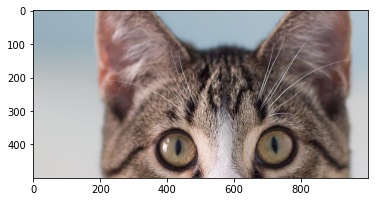

In [207]:
im = io.imread(path_im)
# resizes the image
# im = im[1000:2000,500:1500]
im = im[500:1000,1000:2000]
plt.imshow(im)
plt.show()

In [208]:
def conv2d(im, ker):
    """
    args:
        im: np.array
        ker: 3x3 np.array
    returns:
        im: np.array
    """
    x,y,_ = im.shape
    x = x - 2
    y = y - 2
    out = np.zeros((x,y,3))
    ker = np.tile(np.expand_dims(ker,-1),[1,1,3])
    for i in range(x):
        for j in range(y):
            out[i][j] = np.sum(im[i:i+3, j:j+3, :]*ker, axis=(0,1))
    return out

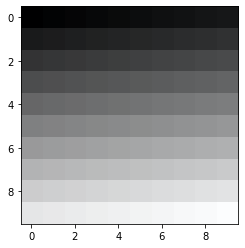

In [168]:
n = 10
size = pow(n,2)*3
im = np.reshape(np.arange(size),(n,n,3))/size

plt.imshow(im)
plt.show()

In [123]:
ker = np.array([[0,1,0],[0,0,0],[0,-1,0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time conv method1:2.6238040924072266


[]

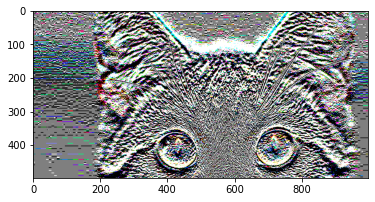

In [209]:
ker = np.array([[0,1,0],[0,0,0],[0,-1,0]])
start = time()
out=conv2d(im,ker)
print("Time conv method1:" + str(time()-start))
plt.imshow((out+1)/2)
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7]
[0 1 2 1 2 3 2 3 4 3 4 5 4 5 6 5 6 7 6 7 8 7 8 9]
(8, 8, 3, 3, 3)
[[[ 1  1  1]
  [-1 -1 -1]
  [ 1  1  1]
  [ 1  1  1]
  [-2 -2 -2]
  [ 2  0  1]
  [-1 -1 -1]
  [ 1  3  2]]

 [[ 2  2  2]
  [-2 -2 -2]
  [ 0  0  0]
  [ 1  1  1]
  [-3 -3 -3]
  [ 1 -1  0]
  [-1 -1 -1]
  [ 1  3  2]]

 [[ 3  3  3]
  [-3 -3 -3]
  [ 1  1  1]
  [ 1  1  1]
  [-3 -3 -3]
  [ 1 -1  0]
  [ 0  0  0]
  [-1  1  0]]

 [[ 3  3  3]
  [-3 -3 -3]
  [ 3  3  3]
  [ 0  0  0]
  [ 0  0  0]
  [ 1 -1  0]
  [ 0  0  0]
  [-1  1  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 1 -1  0]
  [ 0  0  0]
  [-1  1  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 1 -1  0]
  [ 0  0  0]
  [-1  1  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 1 -1  0]
  [ 0  0  0]
  [-2  0 -1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  [ 2  0  1]
  [ 0  0  0]
 

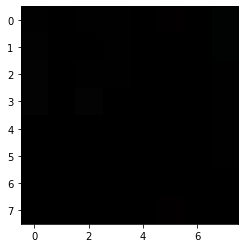

In [195]:
in_len = 10
ker_len = 3
out_len = in_len - ker_len +1

# 1D transform
f = lambda dim1, dim2, axis: np.reshape(np.tile(np.expand_dims(np.arange(dim1),axis),dim2),-1)

idx0 = f(ker_len, out_len, 0)
# idx0 = np.reshape(np.tile(np.expand_dims(np.arange(ker_len),0),out_len),-1)
print(idx0)

# idx1 = np.reshape(np.tile(np.expand_dims(np.arange(out_len),1),ker_len),-1)
idx1 = f(out_len, ker_len, 1)
print(idx1)

idx_list = idx0+idx1
print(idx_list)

# 2D transform
g = lambda ed_axis, tile_axis: np.reshape(np.tile(np.expand_dims(idx_list,ed_axis),tile_axis),-1)

# idx_list0 = np.reshape(np.tile(np.expand_dims(idx_list,1),(1,len(idx_list))),-1)
idx_list0 = g(1,(1,len(idx_list)))
# print(idx_list0)

# idx_list1 = np.reshape(np.tile(np.expand_dims(idx_list,0),(len(idx_list),1)),-1)
idx_list1 = g(0,(len(idx_list),1))
# print(idx_list1)

r = im[idx_list0,idx_list1,:]
r = np.reshape(r, [out_len,out_len,ker_len,ker_len,3])
print(r.shape)

# reshapes the kernel
ker = np.array([[0,1,0],[0,0,0],[0,-1,0]])
ker = np.reshape(np.tile(np.expand_dims(ker,-1),[1,1,3]),[1,1,3,3,3])

# apply the kernel
out = np.sum(r*ker, axis=(2,3))

# plot
print(out)
plt.imshow(out)
plt.show()

In [193]:
def conv2d(im, ker):
    """
    args:
        im: np.array
        ker: 3x3 np.array
    returns:
        im: np.array
    """
    x,y,_ = im.shape
    x = x - 2
    y = y - 2
    out = np.zeros((x,y,3))
    
    # reshapes the images to (x,k_s,y,k_s,3)
    f = lambda dim1, dim2, axis: np.reshape(np.tile(np.expand_dims(np.arange(dim1),axis),dim2),-1)
    idx_list = f(3, x, 0)+f(y, 3, 1)
    
    g = lambda ed_axis, tile_axis: np.reshape(np.tile(np.expand_dims(idx_list,ed_axis),tile_axis),-1)

    im_reshaped = np.reshape(im[g(1,(1,len(idx_list))), g(0,(len(idx_list),1)), :], [x,3,y,3,3])
    
    # reshapes the kernel
    ker = np.reshape(np.tile(np.expand_dims(ker,-1),[1,1,3]),[1,3,1,3,3])
    
    # applies the kernel to the image
    return np.sum(im_reshaped*ker, axis=(1,3))

In [202]:
def idx_conv1d(in_size, ker_size):
    """
    Function that generates a list of indices. This indices correspond to the indices
    of a 1D input tensor on which we would like to apply a 1D convolution.
    
    For instance, with a 1D input array of size 5 and a kernel of size 3, the
    1D convolution product will successively looks at elements of indices [0,1,2],
    [1,2,3] and [2,3,4] in the input array. In this case, the function idx_conv1d(5,3) 
    outputs the following array: array([0,1,2,1,2,3,2,3,4]).
    
    args:
        in_size: (type: int) size of the input 1d array
        ker_size: (type: int) kernel size
    
    return:
        idx_list: (type: np.array) list of the successive indices of the 1D input array
        access to the 1D convolution algorithm.
    
    example:
        >>> idx_conv1d(in_size=5, ker_size=3)
        array([0,1,2,1,2,3,2,3,4])
    """
    f = lambda dim1, dim2, axis: np.reshape(np.tile(np.expand_dims(np.arange(dim1),axis),dim2),-1)
    out_size = in_size-ker_size+1
    return f(ker_size, out_size, 0)+f(out_size, ker_size, 1)

idx_conv1d(5,3)

array([0, 1, 2, 1, 2, 3, 2, 3, 4])

In [221]:
    def gen_idx_conv1d(in_size, ker_size):
        """
        Generates a list of indices. This indices correspond to the indices
        of a 1D input tensor on which we would like to apply a 1D convolution.

        For instance, with a 1D input array of size 5 and a kernel of size 3, the
        1D convolution product will successively looks at elements of indices [0,1,2],
        [1,2,3] and [2,3,4] in the input array. In this case, the function idx_conv1d(5,3) 
        outputs the following array: array([0,1,2,1,2,3,2,3,4]).

        args:
            in_size: (type: int) size of the input 1d array.
            ker_size: (type: int) kernel size.

        return:
            idx_list: (type: np.array) list of the successive indices of the 1D input array
            access to the 1D convolution algorithm.

        example:
            >>> gen_idx_conv1d(in_size=5, ker_size=3)
            array([0, 1, 2, 1, 2, 3, 2, 3, 4])
        """
        f = lambda dim1, dim2, axis: np.reshape(np.tile(np.expand_dims(np.arange(dim1),axis),dim2),-1)
        out_size = in_size-ker_size+1
        return f(ker_size, out_size, 0)+f(out_size, ker_size, 1)

    def repeat_idx_2d(idx_list, nbof_rep, axis):
        """
        Repeats an array of indices (idx_list) a number of time (nbof_rep) "along" an axis
        (axis). This function helps to browse through a 2d array of size
        (len(idx_list),nbof_rep).

        args:
            idx_list: (type: np.array or list) a 1D array of indices.
            nbof_rep: (type: int) number of repetition.
            axis: (type: int) axis "along" which the repetition will be applied.

        return
            idx_list: (type: np.array) a 1D array of indices of size len(idx_list)*nbof_rep.

        example:
            >>> a = np.array([0, 1, 2])
            >>> repeat_idx_2d(a, 3, 0) # repeats array 'a' 3 times along 'axis' 0
            array([0, 0, 0, 1, 1, 1, 2, 2, 2])

            >>> repeat_idx_2d(a, 3, 1) # repeats array 'a' 3 times along 'axis' 1
            array([0, 1, 2, 0, 1, 2, 0, 1, 2])

            >>> b = np.reshape(np.arange(3*4), (3,4))
            >>> b[repeat_idx_2d(np.arange(3), 4, 0), repeat_idx_2d(np.arange(4), 3, 1)]
            array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
        """
        assert axis in [0,1], "Axis should be equal to 0 or 1."
        tile_axis = (nbof_rep,1) if axis else (1,nbof_rep)
        return np.reshape(np.tile(np.expand_dims(idx_list, 1),tile_axis),-1)

    def conv2d(im, ker):
        """
        Performs a 'valid' 2D convolution on an image. The input image may be
        a 2D or a 3D array.

        The output image frist two dimensions will be reduced depending on the 
        convolution size. 

        The kernel may be a 2D or 3D array. If 2D, it will be applied on every
        channel of the input image. If 3D, its last dimension must match the
        image one.

        args:
            im: (type: np.array) image (2D or 3D).
            ker: (type: np.array) convolution kernel (2D or 3D).

        returns:
            im: (type: np.array) convoled image.

        example:
            >>> im = np.reshape(np.arange(10*10*3),(10,10,3))/(10*10*3) # 3D image
            >>> ker = np.array([[0,1,0],[-1,0,1],[0,-1,0]]) # 2D kernel
            >>> conv2d(im, ker) # 3D array of shape (8,8,3)
        """
        if len(im.shape)==2: # it the image is a 2D array, it is reshaped by expanding the last dimension
            im = np.expand_dims(im,-1)

        im_x, im_y, im_w = im.shape

        if len(ker.shape)==2: # if the kernel is a 2D array, it is reshaped so it will be applied to all of the image channels
            ker = np.tile(np.expand_dims(ker,-1),[1,1,im_w]) # the same kernel will be applied to all of the channels 

        assert ker.shape[-1]==im.shape[-1], "Kernel and image last dimension must match."

        ker_x = ker.shape[0]
        ker_y = ker.shape[1]

        # shape of the output image
        out_x = im_x - ker_x + 1 
        out_y = im_y - ker_y + 1

        # reshapes the image to (out_x, ker_x, out_y, ker_y, im_w)
        idx_list_x = idx_conv1d(im_x, ker_x) # computes the indices of a 1D conv (cf. idx_conv1d doc)
        idx_list_y = idx_conv1d(im_y, ker_y)

        idx_reshaped_x = repeat_idx_2d(idx_list_x, len(idx_list_y), 0) # repeats the previous indices to be used in 2D (cf. repeat_idx_2d doc)
        idx_reshaped_y = repeat_idx_2d(idx_list_y, len(idx_list_x), 1)

        im_reshaped = np.reshape(im[idx_reshaped_x, idx_reshaped_y, :], [out_x, ker_x, out_y, ker_y, im_w]) # reshapes

        # reshapes the 2D kernel
        ker = np.reshape(ker,[1, ker_x, 1, ker_y, im_w])

        # applies the kernel to the image and reduces the dimension back to the one of original input image
        return np.squeeze(np.sum(im_reshaped*ker, axis=(1,3)))

Time conv method2: 0.13176989555358887


[]

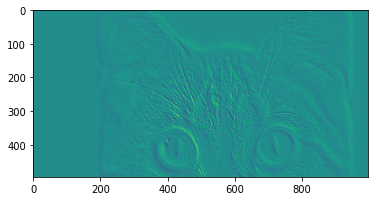

In [225]:
# ker = np.array([[0,1,0],[0,0,0],[0,-1,0]])
ker = np.array([[0,0,1,0,0],[0,0,0,0,0],[-1,0,0,0,1],[0,0,0,0,0],[0,0,-1,0,0]])
start = time()
out=conv2d(im[:,:,1],ker)
print("Time conv method2: " + str(time()-start))
plt.imshow((out+1)/2)
plt.plot()

In [28]:
r = np.array([im[i:i+3] for i in range(3)])

In [33]:
np.sum(r*np.array([-1,0,1]),axis=-1)

array([2, 2, 2])

In [25]:
r = np.reshape(im, [-1,1])

In [27]:
r[1:] + r.T

array([[ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])